Epoch 1/10
23/23 [==============================] - 1s 16ms/step - loss: 32.4212 - accuracy: 0.4876 - val_loss: 8.1066 - val_accuracy: 0.7802
Epoch 2/10
23/23 [==============================] - 0s 6ms/step - loss: 2.8012 - accuracy: 0.8695 - val_loss: 2.3936 - val_accuracy: 0.9011
Epoch 3/10
23/23 [==============================] - 0s 7ms/step - loss: 0.7632 - accuracy: 0.9560 - val_loss: 0.8168 - val_accuracy: 0.9396
Epoch 4/10
23/23 [==============================] - 0s 6ms/step - loss: 0.2362 - accuracy: 0.9849 - val_loss: 0.0772 - val_accuracy: 0.9780
Epoch 5/10
23/23 [==============================] - 0s 7ms/step - loss: 0.0961 - accuracy: 0.9863 - val_loss: 0.7081 - val_accuracy: 0.9615
Epoch 6/10
23/23 [==============================] - 0s 6ms/step - loss: 0.1061 - accuracy: 0.9904 - val_loss: 0.9486 - val_accuracy: 0.9176
Epoch 7/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0447 - accuracy: 0.9931 - val_loss: 0.3080 - val_accuracy: 0.9670
Epoch 8/10
23/23 [

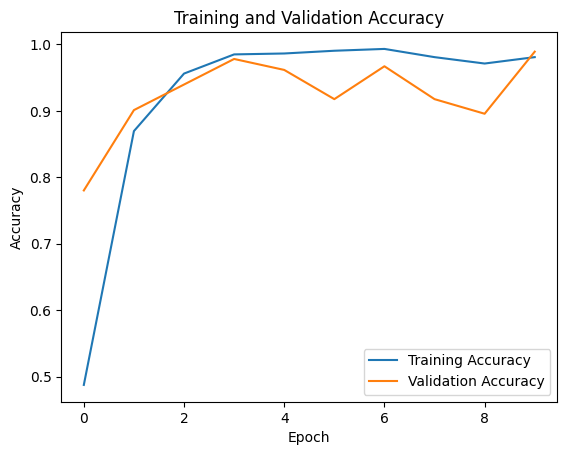

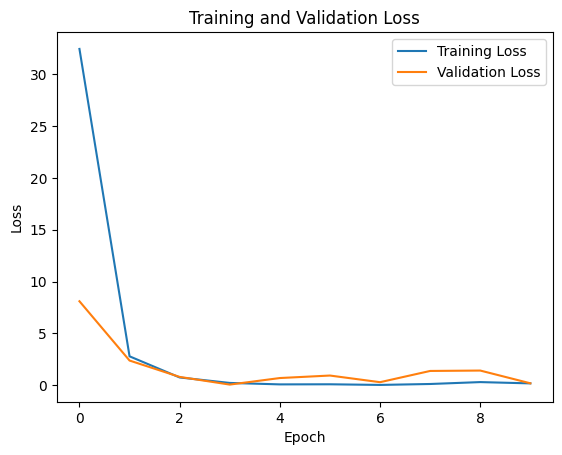

In [4]:
from google.colab import drive


import librosa
import os
import numpy as np

# Define the path to your dataset folder in Google Drive
dataset_folder_path = '/content/drive/My Drive/integrated_audio_datasets'

# Example preprocessing function for audio files in folders
def preprocess_dataset(dataset_folder_path):
    dataset = []
    labels = []
    keyword_folders = os.listdir(dataset_folder_path)
    for label, keyword in enumerate(keyword_folders):
        keyword_folder = os.path.join(dataset_folder_path, keyword)
        audio_files = os.listdir(keyword_folder)
        for audio_file in audio_files:
            file_path = os.path.join(keyword_folder, audio_file)
            audio_data, _ = librosa.load(file_path, sr=16000)  # Load audio with 16kHz sampling rate
            mfccs = librosa.feature.mfcc(y=audio_data, sr=16000, n_mfcc=13)  # Extract MFCC features
            dataset.append(mfccs.T)
            labels.append(label)  # Assign label based on folder index
    return np.array(dataset), np.array(labels)

# Process the dataset
dataset, labels = preprocess_dataset(dataset_folder_path)

import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming you've already loaded and preprocessed the dataset as shown previously

# Split the dataset into training and validation sets
train_dataset, val_dataset, train_labels, val_labels = train_test_split(dataset, labels, test_size=0.2, random_state=42)

# Define the model architecture (same as before)
model = tf.keras.Sequential([
    layers.Input(shape=train_dataset[0].shape),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(labels)), activation='softmax')  # Define output layer based on classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store history for plotting
history = model.fit(train_dataset, train_labels, epochs=10, batch_size=32, validation_data=(val_dataset, val_labels))

# Plot training history (accuracy)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training history (loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


Epoch 1/10
19/19 [==============================] - 5s 28ms/step - loss: 29.1133 - accuracy: 0.4725 - val_loss: 7.6493 - val_accuracy: 0.7877
Epoch 2/10
19/19 [==============================] - 0s 10ms/step - loss: 2.9342 - accuracy: 0.8711 - val_loss: 3.5491 - val_accuracy: 0.8699
Epoch 3/10
19/19 [==============================] - 0s 14ms/step - loss: 1.2803 - accuracy: 0.9210 - val_loss: 2.3197 - val_accuracy: 0.9041
Epoch 4/10
19/19 [==============================] - 0s 9ms/step - loss: 0.3641 - accuracy: 0.9759 - val_loss: 1.5899 - val_accuracy: 0.9384
Epoch 5/10
19/19 [==============================] - 0s 8ms/step - loss: 0.1869 - accuracy: 0.9845 - val_loss: 1.6048 - val_accuracy: 0.9384
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 0.1003 - accuracy: 0.9914 - val_loss: 1.4486 - val_accuracy: 0.9452
Epoch 7/10
19/19 [==============================] - 0s 10ms/step - loss: 0.1196 - accuracy: 0.9863 - val_loss: 1.2822 - val_accuracy: 0.9521
Epoch 8/10
19/1

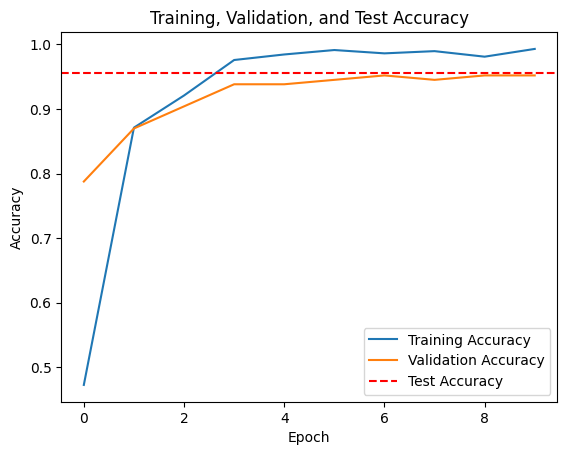

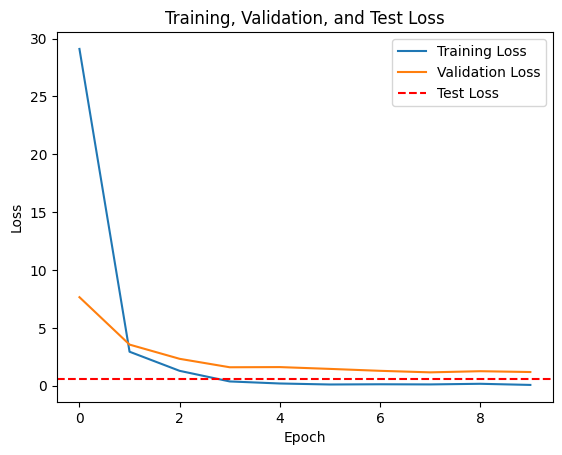

In [7]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming you've already loaded and preprocessed the dataset as shown previously

# Split the dataset into training, validation, and test sets
train_dataset, test_dataset, train_labels, test_labels = train_test_split(dataset, labels, test_size=0.2, random_state=42)
train_dataset, val_dataset, train_labels, val_labels = train_test_split(train_dataset, train_labels, test_size=0.2, random_state=42)

# Define the model architecture (same as before)
model = tf.keras.Sequential([
    layers.Input(shape=train_dataset[0].shape),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(labels)), activation='softmax')  # Define output layer based on classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store history for plotting
history = model.fit(train_dataset, train_labels, epochs=10, batch_size=32, validation_data=(val_dataset, val_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset, test_labels)

# Plot training history (accuracy)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training, Validation, and Test Accuracy')
plt.show()

# Plot training history (loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training, Validation, and Test Loss')
plt.show()


# Quantize the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the quantized TFLite model to a file
with open('model_quantized.tflite', 'wb') as f:
    f.write(tflite_model)




Epoch 1/10
19/19 [==============================] - 9s 148ms/step - loss: 1.5772 - accuracy: 0.3643 - val_loss: 1.3295 - val_accuracy: 0.5890
Epoch 2/10
19/19 [==============================] - 3s 162ms/step - loss: 1.1848 - accuracy: 0.6770 - val_loss: 1.0240 - val_accuracy: 0.7671
Epoch 3/10
19/19 [==============================] - 3s 135ms/step - loss: 0.8921 - accuracy: 0.8368 - val_loss: 0.7247 - val_accuracy: 0.8836
Epoch 4/10
19/19 [==============================] - 2s 134ms/step - loss: 0.6264 - accuracy: 0.9227 - val_loss: 0.4918 - val_accuracy: 0.9521
Epoch 5/10
19/19 [==============================] - 2s 117ms/step - loss: 0.4055 - accuracy: 0.9794 - val_loss: 0.3625 - val_accuracy: 0.9658
Epoch 6/10
19/19 [==============================] - 1s 54ms/step - loss: 0.2912 - accuracy: 0.9880 - val_loss: 0.2481 - val_accuracy: 0.9795
Epoch 7/10
19/19 [==============================] - 1s 47ms/step - loss: 0.2006 - accuracy: 0.9931 - val_loss: 0.1891 - val_accuracy: 0.9795
Epoch 8/

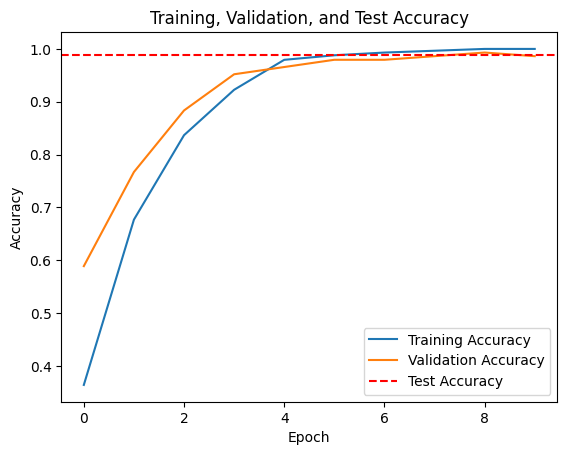

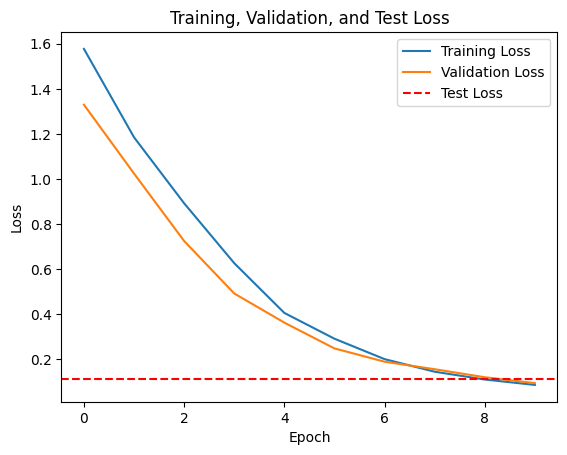

Test Loss: 0.11146862804889679
Test Accuracy: 0.9890109896659851


In [9]:

## RECURRENT NEURAL NETWORKS DUE BETTER WITH SEQUENTIAL DATA, REWRITTEN FOR DEPLOYMENT IN A LIVE EMBEDDED SYSTEM

import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you've already loaded and preprocessed the dataset as shown previously

# Split the dataset into training, validation, and test sets
train_dataset, test_dataset, train_labels, test_labels = train_test_split(dataset, labels, test_size=0.2, random_state=42)
train_dataset, val_dataset, train_labels, val_labels = train_test_split(train_dataset, train_labels, test_size=0.2, random_state=42)

# Define the RNN model with LSTM layer
model = tf.keras.Sequential([
    layers.Input(shape=train_dataset[0].shape),
    layers.LSTM(128),  # LSTM layer with 128 units
    layers.Dense(len(np.unique(labels)), activation='softmax')  # Output layer based on classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store history for plotting
history = model.fit(train_dataset, train_labels, epochs=10, batch_size=32, validation_data=(val_dataset, val_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset, test_labels)

# Plot training history (accuracy)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training, Validation, and Test Accuracy')
plt.show()

# Plot training history (loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training, Validation, and Test Loss')
plt.show()

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


# Quantize the model to TFLite


converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Set supported ops to include required ops and disable experimental flag
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False

tflite_model = converter.convert()

# Save the quantized TFLite model to a file
with open('model_quantized.tflite', 'wb') as f:
    f.write(tflite_model)

